In [1]:
# setting logging to print only error messages
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Feature_final_dataset.csv')

In [3]:
df.head()

,timestamp,token_id,usd_price,royalty_fee,platform_fee,minted_timestamp,collection_name,Background,Fur,Eyes,...,transaction_type,resale_value,_median_resale_price,days_to_first_resale,days_since_minting,transaction_frequency,price_volatility,month,day_of_week,linear_regression_trend
0,2021-09-03 02:03:48+00:00,1,26236.07,0.17500,0.17500,2021-08-29 00:42:17+00:00,MutantApeYachtClub,M1 Gray,M1 Cream,M1 Eyepatch,...,sale,0.00,NaN,5,5,1,NaN,September,Friday,stable
1,2021-10-09 19:40:23+00:00,2,71858.40,0.50000,0.50000,2021-08-29 00:42:17+00:00,MutantApeYachtClub,M1 Blue,M1 Brown,M1 Bored,...,sale,0.00,NaN,41,41,4,NaN,October,Saturday,downward
2,2022-03-03 12:29:01+00:00,2,48053.48,0.41000,0.41000,2021-08-29 00:42:17+00:00,MutantApeYachtClub,M1 Blue,M1 Brown,M1 Bored,...,resale,-23804.92,48053.48,41,186,4,3984.754783,March,Thursday,downward
3,2022-03-17 16:54:29+00:00,2,49593.68,0.44375,0.44375,2021-08-29 00:42:17+00:00,MutantApeYachtClub,M1 Blue,M1 Brown,M1 Bored,...,resale,1540.20,48053.48,41,200,4,3984.754783,March,Thursday,downward
4,2022-08-15 07:17:41+00:00,2,42051.90,0.55000,0.55000,2021-08-29 00:42:17+00:00,MutantApeYachtClub,M1 Blue,M1 Brown,M1 Bored,...,resale,-7541.78,48053.48,41,351,4,3984.754783,August,Monday,downward


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94027 entries, 0 to 94026
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                94027 non-null  object 
 1   token_id                 94027 non-null  int64  
 2   usd_price                94027 non-null  float64
 3   royalty_fee              94027 non-null  float64
 4   platform_fee             94027 non-null  float64
 5   minted_timestamp         94027 non-null  object 
 6   collection_name          94027 non-null  object 
 7   Background               94023 non-null  object 
 8   Fur                      94023 non-null  object 
 9   Eyes                     94023 non-null  object 
 10  Clothes                  77229 non-null  object 
 11  Hat                      71443 non-null  object 
 12  Mouth                    94023 non-null  object 
 13  Earring                  25171 non-null  object 
 14  Background_rarity_scor

In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
label_encoders = {}

# Columns to be label encoded
columns_to_encode = ['Background', 'Fur', 'Eyes', 'Clothes', 'Hat', 'Mouth', 'Earring']

# Apply label encoding to each column
for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Display the first few rows of the transformed dataset
df.head()

,timestamp,token_id,usd_price,royalty_fee,platform_fee,minted_timestamp,collection_name,Background,Fur,Eyes,...,transaction_type,resale_value,_median_resale_price,days_to_first_resale,days_since_minting,transaction_frequency,price_volatility,month,day_of_week,linear_regression_trend
0,2021-09-03 02:03:48+00:00,1,26236.07,0.17500,0.17500,2021-08-29 00:42:17+00:00,MutantApeYachtClub,7,14,25,...,sale,0.00,NaN,5,5,1,NaN,September,Friday,stable
1,2021-10-09 19:40:23+00:00,2,71858.40,0.50000,0.50000,2021-08-29 00:42:17+00:00,MutantApeYachtClub,6,12,20,...,sale,0.00,NaN,41,41,4,NaN,October,Saturday,downward
2,2022-03-03 12:29:01+00:00,2,48053.48,0.41000,0.41000,2021-08-29 00:42:17+00:00,MutantApeYachtClub,6,12,20,...,resale,-23804.92,48053.48,41,186,4,3984.754783,March,Thursday,downward
3,2022-03-17 16:54:29+00:00,2,49593.68,0.44375,0.44375,2021-08-29 00:42:17+00:00,MutantApeYachtClub,6,12,20,...,resale,1540.20,48053.48,41,200,4,3984.754783,March,Thursday,downward
4,2022-08-15 07:17:41+00:00,2,42051.90,0.55000,0.55000,2021-08-29 00:42:17+00:00,MutantApeYachtClub,6,12,20,...,resale,-7541.78,48053.48,41,351,4,3984.754783,August,Monday,downward


In [6]:
df.isnull().sum()

timestamp                      0
token_id                       0
usd_price                      0
royalty_fee                    0
platform_fee                   0
minted_timestamp               0
collection_name                0
Background                     0
Fur                            0
Eyes                           0
Clothes                        0
Hat                            0
Mouth                          0
Earring                        0
Background_rarity_score        4
Fur_rarity_score               4
Eyes_rarity_score              4
Clothes_rarity_score       16798
Hat_rarity_score           22584
Mouth_rarity_score             4
Earring_rarity_score       68856
transaction_type               0
resale_value                   0
_median_resale_price       22844
days_to_first_resale           0
days_since_minting             0
transaction_frequency          0
price_volatility           27565
month                          0
day_of_week                    0
linear_reg

In [7]:
null_counts = df.isnull().sum()

# Fill null values with zeros
df.fillna(-9999, inplace=True)

In [8]:
corr_matrix = df.corr(method='spearman')
corr_matrix['usd_price'].sort_values(ascending=False)

C:\Users\210221736\AppData\Local\Temp\ipykernel_10316\777412155.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='spearman')


usd_price                  1.000000
royalty_fee                0.690742
_median_resale_price       0.568483
platform_fee               0.529615
days_since_minting         0.452899
price_volatility           0.352088
resale_value               0.341852
days_to_first_resale       0.150791
Mouth                      0.087411
Background_rarity_score    0.087191
Mouth_rarity_score         0.086476
Eyes_rarity_score          0.079422
Fur_rarity_score           0.077691
Fur                        0.064623
Hat_rarity_score           0.063764
Clothes_rarity_score       0.063001
Eyes                       0.051025
transaction_frequency      0.043531
Background                 0.030909
Earring_rarity_score       0.021951
Clothes                    0.019744
Hat                        0.015810
token_id                   0.012076
Earring                   -0.008683
Name: usd_price, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split


# Define the bins for usd_price
bins = [0, 25000, 120000, 375000, np.inf]
labels = [1, 2, 3, 4]
df['price_cat'] = pd.cut(df['usd_price'], bins=bins, labels=labels)

# Perform a stratified train-test split based on the price categories
train_set, test_set = train_test_split(df, test_size=0.2, random_state=7, stratify=df['price_cat'])

# Drop the 'price_cat' column as it's no longer needed
train_set = train_set.drop('price_cat', axis=1)
test_set =  test_set.drop('price_cat', axis=1)

train_set.shape, test_set.shape


((75221, 31), (18806, 31))

In [10]:
# Import library
#from sklearn.model_selection import train_test_split

In [11]:
#from sklearn.model_selection import train_test_split

#train_set, test_set = train_test_split(df, test_size=0.2, random_state=7)
#print(f"{train_set.shape[0]} train and {test_set.shape[0]} test instances")

In [10]:
train_set.head()

,timestamp,token_id,usd_price,royalty_fee,platform_fee,minted_timestamp,collection_name,Background,Fur,Eyes,...,transaction_type,resale_value,_median_resale_price,days_to_first_resale,days_since_minting,transaction_frequency,price_volatility,month,day_of_week,linear_regression_trend
36877,2022-06-03 01:56:16+00:00,5148,25769.80,0.35000,0.35000,2021-08-29 01:19:04+00:00,MutantApeYachtClub,11,27,24,...,resale,-72155.39,28406.300,0,278,11,23672.784820,June,Friday,downward
55684,2021-06-15 06:54:56+00:00,7742,8560.77,0.08200,0.08200,2021-05-01 08:20:13+00:00,BoredApeYachtClub,22,6,5,...,resale,7105.39,9929.265,1,44,3,1935.344189,June,Tuesday,upward
57165,2022-12-14 01:42:23+00:00,7941,86761.15,0.00000,0.00000,2021-05-01 08:22:11+00:00,BoredApeYachtClub,2,2,8,...,resale,1010.24,86970.690,246,591,48,46958.612920,December,Wednesday,upward
66032,2021-05-01 15:47:15+00:00,9136,687.42,0.00600,0.00600,2021-05-01 08:31:47+00:00,BoredApeYachtClub,2,4,5,...,sale,0.00,-9999.000,0,0,3,-9999.000000,May,Saturday,upward
35482,2021-05-08 05:24:33+00:00,4965,2447.23,0.01725,0.01725,2021-05-01 07:42:28+00:00,BoredApeYachtClub,1,3,12,...,resale,105.74,2447.230,2,6,4,3789.229999,May,Saturday,upward


In [11]:
test_set.head()

,timestamp,token_id,usd_price,royalty_fee,platform_fee,minted_timestamp,collection_name,Background,Fur,Eyes,...,transaction_type,resale_value,_median_resale_price,days_to_first_resale,days_since_minting,transaction_frequency,price_volatility,month,day_of_week,linear_regression_trend
60613,2023-03-02 09:02:59+00:00,8437,24802.79,0.075379,0.0000,2021-08-29 01:28:04+00:00,MutantApeYachtClub,4,21,21,...,resale,-15.53,24528.00,0,550,26,2588.536338,March,Thursday,upward
84739,2022-12-22 00:42:35+00:00,21546,18168.64,0.000000,0.0000,2021-08-29 04:49:27+00:00,MutantApeYachtClub,6,21,17,...,resale,-797.91,18151.54,230,479,22,810.481519,December,Thursday,upward
4558,2021-07-13 23:19:19+00:00,633,8741.70,0.112500,0.1125,2021-04-30 23:48:46+00:00,BoredApeYachtClub,22,4,6,...,resale,6996.72,105113.98,2,73,11,45827.742870,July,Tuesday,upward
58077,2022-12-17 12:30:35+00:00,8069,76905.42,0.000000,0.0000,2021-05-01 08:23:22+00:00,BoredApeYachtClub,2,5,8,...,resale,226.02,81207.93,24,595,56,42236.368560,December,Saturday,downward
70894,2022-01-01 19:31:52+00:00,9783,65328.13,0.436100,0.4361,2021-08-29 01:32:30+00:00,MutantApeYachtClub,16,29,44,...,resale,39864.03,55687.06,8,125,4,8425.357348,January,Saturday,downward


In [12]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

one_hot_encoder = OneHotEncoder(drop="first", sparse=False)

# categorical columns to transform
cat_cols = ['linear_regression_trend', 'collection_name', 'transaction_type']

# fit an encoder and transform the trainset
cat_vals = train_set[cat_cols].to_numpy()
transformed = one_hot_encoder.fit_transform(cat_vals)

# the names of the new columns are the unique values of the categorical columns
new_col_names = one_hot_encoder.get_feature_names_out(input_features=cat_cols)

# put the transformed data as columns in the trainset dataframe
train_set[new_col_names] = transformed

# check if the dummies are produced correctly in the trainset
train_set.head()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,timestamp,token_id,usd_price,royalty_fee,platform_fee,minted_timestamp,collection_name,Background,Fur,Eyes,...,days_since_minting,transaction_frequency,price_volatility,month,day_of_week,linear_regression_trend,linear_regression_trend_stable,linear_regression_trend_upward,collection_name_MutantApeYachtClub,transaction_type_sale
36877,2022-06-03 01:56:16+00:00,5148,25769.80,0.35000,0.35000,2021-08-29 01:19:04+00:00,MutantApeYachtClub,11,27,24,...,278,11,23672.784820,June,Friday,downward,0.0,0.0,1.0,0.0
55684,2021-06-15 06:54:56+00:00,7742,8560.77,0.08200,0.08200,2021-05-01 08:20:13+00:00,BoredApeYachtClub,22,6,5,...,44,3,1935.344189,June,Tuesday,upward,0.0,1.0,0.0,0.0
57165,2022-12-14 01:42:23+00:00,7941,86761.15,0.00000,0.00000,2021-05-01 08:22:11+00:00,BoredApeYachtClub,2,2,8,...,591,48,46958.612920,December,Wednesday,upward,0.0,1.0,0.0,0.0
66032,2021-05-01 15:47:15+00:00,9136,687.42,0.00600,0.00600,2021-05-01 08:31:47+00:00,BoredApeYachtClub,2,4,5,...,0,3,-9999.000000,May,Saturday,upward,0.0,1.0,0.0,1.0
35482,2021-05-08 05:24:33+00:00,4965,2447.23,0.01725,0.01725,2021-05-01 07:42:28+00:00,BoredApeYachtClub,1,3,12,...,6,4,3789.229999,May,Saturday,upward,0.0,1.0,0.0,0.0


In [13]:
# transform the **testset** using the encoder fitted on trainset
cat_vals = test_set[cat_cols].to_numpy()
transformed = one_hot_encoder.transform(cat_vals)

# put the transformed data as columns in the testset dataframe
for i, new_col_name in enumerate(new_col_names):
    test_set[new_col_name] = transformed[:,i]
    
# check if the dummies are produced correctly in the testset
test_set.head()

,timestamp,token_id,usd_price,royalty_fee,platform_fee,minted_timestamp,collection_name,Background,Fur,Eyes,...,days_since_minting,transaction_frequency,price_volatility,month,day_of_week,linear_regression_trend,linear_regression_trend_stable,linear_regression_trend_upward,collection_name_MutantApeYachtClub,transaction_type_sale
60613,2023-03-02 09:02:59+00:00,8437,24802.79,0.075379,0.0000,2021-08-29 01:28:04+00:00,MutantApeYachtClub,4,21,21,...,550,26,2588.536338,March,Thursday,upward,0.0,1.0,1.0,0.0
84739,2022-12-22 00:42:35+00:00,21546,18168.64,0.000000,0.0000,2021-08-29 04:49:27+00:00,MutantApeYachtClub,6,21,17,...,479,22,810.481519,December,Thursday,upward,0.0,1.0,1.0,0.0
4558,2021-07-13 23:19:19+00:00,633,8741.70,0.112500,0.1125,2021-04-30 23:48:46+00:00,BoredApeYachtClub,22,4,6,...,73,11,45827.742870,July,Tuesday,upward,0.0,1.0,0.0,0.0
58077,2022-12-17 12:30:35+00:00,8069,76905.42,0.000000,0.0000,2021-05-01 08:23:22+00:00,BoredApeYachtClub,2,5,8,...,595,56,42236.368560,December,Saturday,downward,0.0,0.0,0.0,0.0
70894,2022-01-01 19:31:52+00:00,9783,65328.13,0.436100,0.4361,2021-08-29 01:32:30+00:00,MutantApeYachtClub,16,29,44,...,125,4,8425.357348,January,Saturday,downward,0.0,0.0,1.0,0.0


In [14]:
test_set.drop("timestamp", axis=1, inplace=True)
train_set.drop("timestamp", axis=1, inplace=True)

test_set.drop("minted_timestamp", axis=1, inplace=True)
train_set.drop("minted_timestamp", axis=1, inplace=True)

#test_set.drop("token_id", axis=1, inplace=True)
#train_set.drop("token_id", axis=1, inplace=True)


In [15]:
test_set.drop("month", axis=1, inplace=True)
train_set.drop("month", axis=1, inplace=True)

test_set.drop("day_of_week", axis=1, inplace=True)
train_set.drop("day_of_week", axis=1, inplace=True)

test_set.drop("linear_regression_trend", axis=1, inplace=True)
train_set.drop("linear_regression_trend", axis=1, inplace=True)

test_set.drop("collection_name", axis=1, inplace=True)
train_set.drop("collection_name", axis=1, inplace=True)

test_set.drop("transaction_type", axis=1, inplace=True)
train_set.drop("transaction_type", axis=1, inplace=True)

In [16]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler instance
scaler = RobustScaler()

# Separate the target variable and predictors
trainset_target = train_set[['usd_price']].values
trainset_predictors = train_set.drop(['usd_price'], axis=1)

# Apply the RobustScaler to the predictor variables
scaled_vals = scaler.fit_transform(trainset_predictors)
train_set = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)

# Put the non-scaled target variable back in
train_set[['usd_price']] = trainset_target

# Inspect the data
train_set.head()


,token_id,royalty_fee,platform_fee,Background,Fur,Eyes,Clothes,Hat,Mouth,Earring,...,_median_resale_price,days_to_first_resale,days_since_minting,transaction_frequency,price_volatility,linear_regression_trend_stable,linear_regression_trend_upward,collection_name_MutantApeYachtClub,transaction_type_sale,usd_price
0,-0.214758,0.566634,0.518496,0.375,0.7500,0.10,-0.105882,-0.202532,0.290323,0.0,...,0.100021,-0.101449,0.320099,0.714286,0.447620,0.0,-1.0,0.0,0.0,25769.80
1,0.193361,-0.186069,-0.131595,1.750,-0.5625,-0.85,-0.552941,-0.531646,-0.483871,0.0,...,-0.307687,-0.086957,-0.260546,-0.428571,-0.117479,0.0,0.0,-1.0,0.0,8560.77
2,0.224670,-0.416374,-0.330503,-0.750,-0.8125,-0.70,-0.576471,0.746835,-0.451613,0.0,...,1.392282,3.463768,1.096774,6.000000,1.052972,0.0,0.0,-1.0,0.0,86761.15
3,0.412681,-0.399523,-0.315949,-0.750,-0.6875,-0.85,-0.517647,0.746835,-1.096774,-1.0,...,-0.747417,-0.101449,-0.369727,-0.428571,-0.427731,0.0,0.0,-1.0,1.0,687.42
4,-0.243549,-0.367926,-0.288660,-0.875,-0.7500,-0.50,0.741176,-0.607595,-0.483871,0.0,...,-0.472783,-0.072464,-0.354839,-0.285714,-0.069284,0.0,0.0,-1.0,0.0,2447.23


In [17]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler instance
scaler = RobustScaler()

# Fit the transformer on the training set
scaler.fit(trainset_predictors)

# Separate the target variable and predictors in the test set
testset_target = test_set["usd_price"].values
testset_predictors = test_set.drop("usd_price", axis=1)

# Apply the RobustScaler to the predictor variables in the test set
scaled_vals = scaler.transform(testset_predictors)
test_set = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# Put the non-scaled target variable back in the test set DataFrame
test_set['usd_price'] = testset_target

# Inspect the modified test set
test_set.head()


,token_id,royalty_fee,platform_fee,Background,Fur,Eyes,Clothes,Hat,Mouth,Earring,...,_median_resale_price,days_to_first_resale,days_since_minting,transaction_frequency,price_volatility,linear_regression_trend_stable,linear_regression_trend_upward,collection_name_MutantApeYachtClub,transaction_type_sale,usd_price
0,0.302706,-0.204664,-0.330503,-0.50,0.3750,-0.05,-0.211765,-0.126582,0.548387,0.0,...,0.014444,-0.101449,0.995037,2.857143,-0.100498,0.0,0.0,0.0,0.0,24802.79
1,2.365167,-0.416374,-0.330503,-0.25,0.3750,-0.25,-0.282353,-0.126582,0.612903,0.0,...,-0.126257,3.231884,0.818859,2.285714,-0.146722,0.0,0.0,0.0,0.0,18168.64
2,-0.925110,-0.100407,-0.057611,1.75,-0.6875,-0.80,0.847059,0.645570,2.064516,-1.0,...,1.792626,-0.072464,-0.188586,0.714286,1.023573,0.0,0.0,-1.0,0.0,8741.70
3,0.244808,-0.416374,-0.330503,-0.75,-0.6250,-0.70,0.729412,0.746835,-0.806452,-1.0,...,1.265123,0.246377,1.106700,7.142857,0.930210,0.0,-1.0,-1.0,0.0,76905.42
4,0.514475,0.808454,0.727350,1.00,0.8750,1.10,0.129412,0.101266,1.064516,-3.0,...,0.701989,0.014493,-0.059553,-0.285714,0.051239,0.0,-1.0,0.0,0.0,65328.13


In [18]:
# drop labels for training set, but keep all others
Xtrain = train_set.drop("usd_price", axis=1)

ytrain = train_set["usd_price"].copy()

# drop labels for training set, but keep all others
Xtest = test_set.drop("usd_price", axis=1)

ytest = test_set["usd_price"].copy()

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Fit the Decision Tree Regressor model on the training data
tree_reg = DecisionTreeRegressor()
tree_reg.fit(Xtrain, ytrain)

# Make predictions on the training data
yhat_train = tree_reg.predict(Xtrain)
yhat_test = tree_reg.predict(Xtest)

# Calculate RMSE and MAE on the training data
train_rmse = np.sqrt(mean_squared_error(ytrain, yhat_train))
train_mae = mean_absolute_error(ytrain, yhat_train)

# Calculate RMSE and MAE on the test data
test_rmse = np.sqrt(mean_squared_error(ytest, yhat_test))
test_mae = mean_absolute_error(ytest, yhat_test)

# Print the results
print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)


Training RMSE: 9.854636883206896e-13
Training MAE: 4.382446909765676e-14
Test RMSE: 35354.90102261317
Test MAE: 3785.626569654365


In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Create a DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

# Define a custom scoring function for MAE
scoring = {
    'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
    'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False)
}

# Perform cross-validation and calculate both RMSE and MAE for both training and test data
cv_results = cross_validate(tree_reg, Xtrain, ytrain, scoring=scoring, cv=10, return_train_score=True)

# Extract RMSE and MAE scores for training and test data
train_rmse_scores = -cv_results['train_neg_root_mean_squared_error']
test_rmse_scores = -cv_results['test_neg_root_mean_squared_error']

train_mae_scores = -cv_results['train_neg_mean_absolute_error']
test_mae_scores = -cv_results['test_neg_mean_absolute_error']

def display_scores(scores, metric, data_type):
    print(f"{data_type} {metric} Scores:")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Calculate and display the mean and standard deviation of RMSE and MAE for training and test data
display_scores(train_rmse_scores, "RMSE", "Training")
display_scores(test_rmse_scores, "RMSE", "Test")

display_scores(train_mae_scores, "MAE", "Training")
display_scores(test_mae_scores, "MAE", "Test")


Training RMSE Scores:
Scores: [9.84720810e-13 9.94615334e-13 9.32610755e-13 9.89096208e-13
 9.90972188e-13 9.82576939e-13 1.00573203e-12 9.30433073e-13
 1.03714468e-12 9.34207758e-13]
Mean: 9.782109769347024e-13
Standard deviation: 3.337792661987009e-14
Test RMSE Scores:
Scores: [27325.29671635 15209.66516083 33041.47614595 22503.43197657
 17955.00737319 34067.89626535 19808.57406645 17590.16307995
 22704.48172497 23147.57144005]
Mean: 23335.356394966184
Standard deviation: 6056.91022042217
Training MAE Scores:
Scores: [4.32081547e-14 4.40429651e-14 3.54206063e-14 4.24258005e-14
 4.34493355e-14 4.06793324e-14 4.21327629e-14 3.87204305e-14
 4.65174116e-14 3.84567794e-14]
Mean: 4.1505357890919054e-14
Standard deviation: 3.0697837291795327e-15
Test MAE Scores:
Scores: [3781.96404772 3280.57242189 4126.84281888 3567.29154347 3398.45921302
 3842.59390838 3559.10687475 3476.94033617 3472.61825718 3505.04987246]
Mean: 3601.143929391852
Standard deviation: 235.64657060716686


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Create a Random Forest Regressor model
rf_reg = RandomForestRegressor()

# Fit the model on the training data (Xtrain and ytrain)
rf_reg.fit(Xtrain, ytrain)

# Make predictions on the training and test data
yhat_train = rf_reg.predict(Xtrain)
yhat_test = rf_reg.predict(Xtest)

# Calculate RMSE and MAE on the training data
train_rmse = np.sqrt(mean_squared_error(ytrain, yhat_train))
train_mae = mean_absolute_error(ytrain, yhat_train)

# Calculate RMSE and MAE on the test data
test_rmse = np.sqrt(mean_squared_error(ytest, yhat_test))
test_mae = mean_absolute_error(ytest, yhat_test)

# Print the results
print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)


Training RMSE: 7099.5558474024665
Training MAE: 973.710246842403
Test RMSE: 27551.921473104776
Test MAE: 2872.3807824707196


In [22]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "yhat": yhat[:50]})

# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

NameError: name 'yhat' is not defined

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Create a DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

# Define a custom scoring function for MAE
scoring = {
    'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
    'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False)
}

# Perform cross-validation and calculate both RMSE and MAE for both training and test data
cv_results = cross_validate(tree_reg, Xtrain, ytrain, scoring=scoring, cv=10, return_train_score=True)

# Extract RMSE and MAE scores for training and test data
train_rmse_scores = -cv_results['train_neg_root_mean_squared_error']
test_rmse_scores = -cv_results['test_neg_root_mean_squared_error']

train_mae_scores = -cv_results['train_neg_mean_absolute_error']
test_mae_scores = -cv_results['test_neg_mean_absolute_error']

def display_scores(scores, metric, data_type):
    print(f"{data_type} {metric} Scores:")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Calculate and display the mean and standard deviation of RMSE and MAE for training and test data
display_scores(train_rmse_scores, "RMSE", "Training")
display_scores(test_rmse_scores, "RMSE", "Test")

display_scores(train_mae_scores, "MAE", "Training")
display_scores(test_mae_scores, "MAE", "Test")


Training RMSE Scores:
Scores: [1.00145389e-12 1.00359176e-12 9.30827260e-13 9.94615046e-13
 1.00293390e-12 9.82253571e-13 1.02003883e-12 9.45724461e-13
 1.02634425e-12 6.16160793e-13]
Mean: 9.52394376232207e-13
Standard deviation: 1.1569935819775012e-13
Test RMSE Scores:
Scores: [28653.08551323 14286.87574753 23288.78218728 22792.44670853
 18103.92408153 36535.1218803  20200.33007191 15788.99348382
 18314.63715419 23400.62814838]
Mean: 22136.482497670342
Standard deviation: 6242.329189635653
Training MAE Scores:
Scores: [4.51427353e-14 4.47684221e-14 3.50444434e-14 4.41991399e-14
 4.54913626e-14 4.02225632e-14 4.49002470e-14 4.22939780e-14
 4.55501356e-14 3.08529152e-14]
Mean: 4.184659422946307e-14
Standard deviation: 4.80863086854203e-15
Test MAE Scores:
Scores: [3859.31428182 3259.56542885 3722.27157719 3658.32659666 3417.94602743
 3965.67424647 3688.34026496 3446.94772672 3364.28682422 3543.88507624]
Mean: 3592.6558050550207
Standard deviation: 213.9514997853365


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a RandomForestRegressor instance
forest_reg = RandomForestRegressor(n_estimators=10, random_state=7)

# Perform cross-validation and calculate RMSE and MAE scores
rmse_scores = np.sqrt(-cross_val_score(forest_reg, Xtrain, ytrain,
                                       scoring="neg_mean_squared_error", cv=10))
mae_scores = -cross_val_score(forest_reg, Xtrain, ytrain,
                              scoring="neg_mean_absolute_error", cv=10)

# Define a function to display the scores
def display_scores(rmse_scores, mae_scores):
    print("RMSE Scores:", rmse_scores)
    print("Mean RMSE:", rmse_scores.mean())
    print("MAE Scores:", mae_scores)
    print("Mean MAE:", mae_scores.mean())

# Display the scores
display_scores(rmse_scores, mae_scores)


RMSE Scores: [16354.29043377 17847.76345209 29566.21518866 21909.48649017
 13405.14693873 27010.95364853 11509.07671951 16216.53829456
 12390.30274222 23427.24561065]
Mean RMSE: 18963.70195189014
MAE Scores: [2812.43547627 2804.53375177 3460.27409579 3051.8998745  2588.55089782
 3182.80284084 2633.75350391 2899.88014848 2738.66122849 2966.2254721 ]
Mean MAE: 2913.9017289970934


Feature Importances:
platform_fee: 0.5379701239776662
royalty_fee: 0.1570414192672262
days_since_minting: 0.10121460280998906
resale_value: 0.06908567771931633
Fur_rarity_score: 0.06094237297219987
_median_resale_price: 0.02799439321532295
price_volatility: 0.012126969087799755
Background_rarity_score: 0.005946679888933989
collection_name_MutantApeYachtClub: 0.005065774784976363
Background: 0.004531959573733659
Mouth_rarity_score: 0.0024185143350109405
Eyes_rarity_score: 0.0023510244189824006
Eyes: 0.0015607069836342986
Mouth: 0.001513012782090388
Clothes_rarity_score: 0.001483814714217007
days_to_first_resale: 0.0014582840048925933
Clothes: 0.0013940737208855988
token_id: 0.0013537919528170386
Fur: 0.0009735817232079981
Earring_rarity_score: 0.0008862578793335767
transaction_frequency: 0.0006381038317076237
Hat_rarity_score: 0.00060672564483279
Hat: 0.0006030812110293856
Earring: 0.0003890123161084673
linear_regression_trend_stable: 0.000254425368449365
linear_regression_trend_upward:

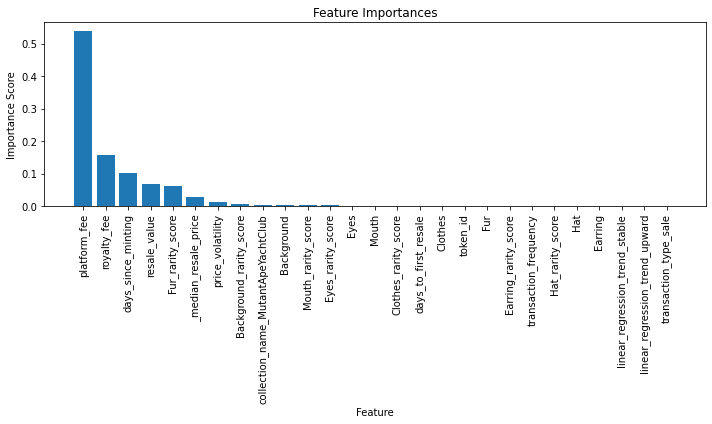

In [23]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Create a RandomForestRegressor instance with your desired parameters
forest_reg = RandomForestRegressor(n_estimators=10, random_state=7)

# Fit the model to your training data
forest_reg.fit(Xtrain, ytrain)

# Get feature importances
feature_importances = forest_reg.feature_importances_

# Assuming you have a list of feature names or column names
feature_names = Xtrain.columns  # Replace with your actual feature names

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Print feature importance scores and corresponding feature names
print("Feature Importances:")
for i in sorted_idx:
    print(f"{feature_names[i]}: {feature_importances[i]}")

# Optionally, you can visualize the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Specify the hyperparameters and their values
param_grid = {
    'n_estimators': [3, 10, 30],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
}

forest_reg = RandomForestRegressor(random_state=7)

# Specify the scoring metrics as a list of strings
scoring = {'RMSE': 'neg_root_mean_squared_error', 'MAE': make_scorer(mean_absolute_error, greater_is_better=False)}

# We'll use 10-fold cross-validation
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                           scoring=scoring, 
                           return_train_score=True, verbose=2,
                           refit='RMSE')  # Refit based on RMSE to get best estimator

grid_search.fit(Xtrain, ytrain)

# Access the results including RMSE and MAE scores
results = grid_search.cv_results_
rmse_scores = np.sqrt(-results['mean_test_RMSE'])
mae_scores = -results['mean_test_MAE']

# Print RMSE and MAE scores for different hyperparameter combinations
for rmse, mae, params in zip(rmse_scores, mae_scores, results['params']):
    print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f} for {params}')

# Predict using the best estimator
best_estimator = grid_search.best_estimator_
y_train_pred = best_estimator.predict(Xtrain)
y_test_pred = best_estimator.predict(Xtest)

# Calculate RMSE and MAE for train set
train_rmse = np.sqrt(mean_squared_error(ytrain, y_train_pred))
train_mae = mean_absolute_error(ytrain, y_train_pred)

# Calculate RMSE and MAE for test set
test_rmse = np.sqrt(mean_squared_error(ytest, y_test_pred))
test_mae = mean_absolute_error(ytest, y_test_pred)

print("\nTrain RMSE:", train_rmse)
print("Train MAE:", train_mae)
print("\nTest RMSE:", test_rmse)
print("Test MAE:", test_mae)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.5s
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.5s
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.5s
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.5s
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.5s
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.5s
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.5s
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.5s
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.5s
[CV] END ...max_depth=4, min_samples_split=2, n_estimators=3; total time=   0.5s
[CV] END ..max_depth=4, min_samples_split=2, n_estimators=10; total time=   1.7s
[CV] END ..max_depth=4, min_samples_split=2, n

[CV] END ..max_depth=6, min_samples_split=2, n_estimators=10; total time=   2.6s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=10; total time=   2.6s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=10; total time=   2.6s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=10; total time=   2.6s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=10; total time=   2.7s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=10; total time=   2.7s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=10; total time=   2.6s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=10; total time=   2.6s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=10; total time=   2.6s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=30; total time=   8.3s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=30; total time=   8.0s
[CV] END ..max_depth=6, min_samples_split=2, n_estimators=30; total time=   8.5s
[CV] END ..max_depth=6, min_

[CV] END ..max_depth=8, min_samples_split=2, n_estimators=30; total time=  10.7s
[CV] END ..max_depth=8, min_samples_split=2, n_estimators=30; total time=  10.7s
[CV] END ..max_depth=8, min_samples_split=2, n_estimators=30; total time=  10.9s
[CV] END ..max_depth=8, min_samples_split=2, n_estimators=30; total time=  10.7s
[CV] END ..max_depth=8, min_samples_split=2, n_estimators=30; total time=  10.7s
[CV] END ..max_depth=8, min_samples_split=2, n_estimators=30; total time=  10.8s
[CV] END ..max_depth=8, min_samples_split=2, n_estimators=30; total time=  10.8s
[CV] END ...max_depth=8, min_samples_split=5, n_estimators=3; total time=   1.0s
[CV] END ...max_depth=8, min_samples_split=5, n_estimators=3; total time=   1.0s
[CV] END ...max_depth=8, min_samples_split=5, n_estimators=3; total time=   1.0s
[CV] END ...max_depth=8, min_samples_split=5, n_estimators=3; total time=   1.0s
[CV] END ...max_depth=8, min_samples_split=5, n_estimators=3; total time=   1.0s
[CV] END ...max_depth=8, min

[CV] END max_depth=None, min_samples_split=5, n_estimators=3; total time=   2.9s
[CV] END max_depth=None, min_samples_split=5, n_estimators=3; total time=   2.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=3; total time=   2.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=3; total time=   2.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=3; total time=   2.6s
[CV] END max_depth=None, min_samples_split=5, n_estimators=3; total time=   2.8s
[CV] END max_depth=None, min_samples_split=5, n_estimators=10; total time=   9.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=10; total time=   9.6s
[CV] END max_depth=None, min_samples_split=5, n_estimators=10; total time=   9.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=10; total time=   9.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=10; total time=   9.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=10; total time=   9.2s
[CV] END max_depth=Non

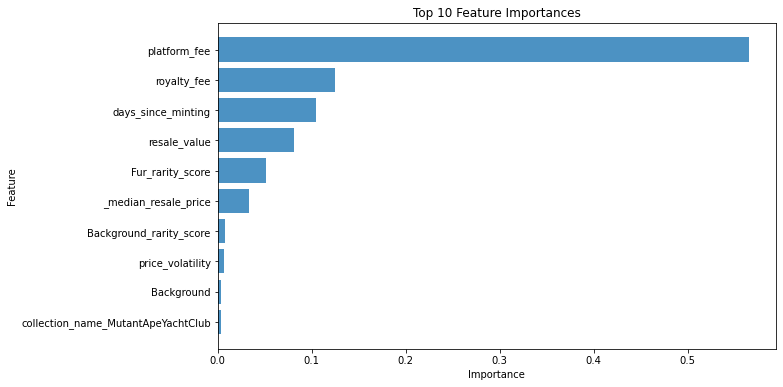

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the feature importances from the best estimator
feature_importances = best_estimator.feature_importances_

# Create a DataFrame for the feature importances
features = pd.DataFrame({
    'feature': Xtrain.columns,  # assuming Xtrain is a DataFrame
    'importance': feature_importances
})

# Sort the features by importance
features = features.sort_values(by='importance', ascending=False)

# Plot the top N features' importances
top_n = 10  # Change this to show more or fewer features
plt.figure(figsize=(10, 6))
plt.barh(features['feature'][:top_n], features['importance'][:top_n], align='center', alpha=0.8)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances'.format(top_n))
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


In [31]:
print(features.head(top_n))


                               feature  importance
2                         platform_fee    0.565410
1                          royalty_fee    0.124490
20                  days_since_minting    0.103982
17                        resale_value    0.080799
11                    Fur_rarity_score    0.051412
18                _median_resale_price    0.032866
10             Background_rarity_score    0.007372
22                    price_volatility    0.007060
3                           Background    0.003309
25  collection_name_MutantApeYachtClub    0.003010


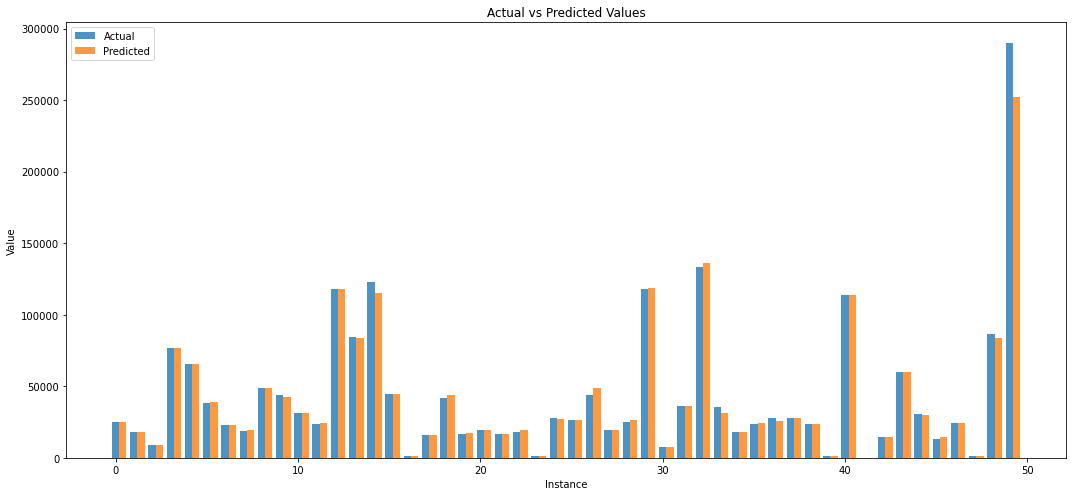

In [27]:
# Limiting the number of instances to display for clarity
num_instances = 50

# Indexes for our subset
indices = list(range(num_instances))

# Plotting
plt.figure(figsize=(15, 7))
plt.bar(indices, ytest[:num_instances], width=0.4, align='center', label='Actual', alpha=0.8)
plt.bar([i + 0.4 for i in indices], y_test_pred[:num_instances], width=0.4, align='center', label='Predicted', alpha=0.8)
plt.xlabel('Instance')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()


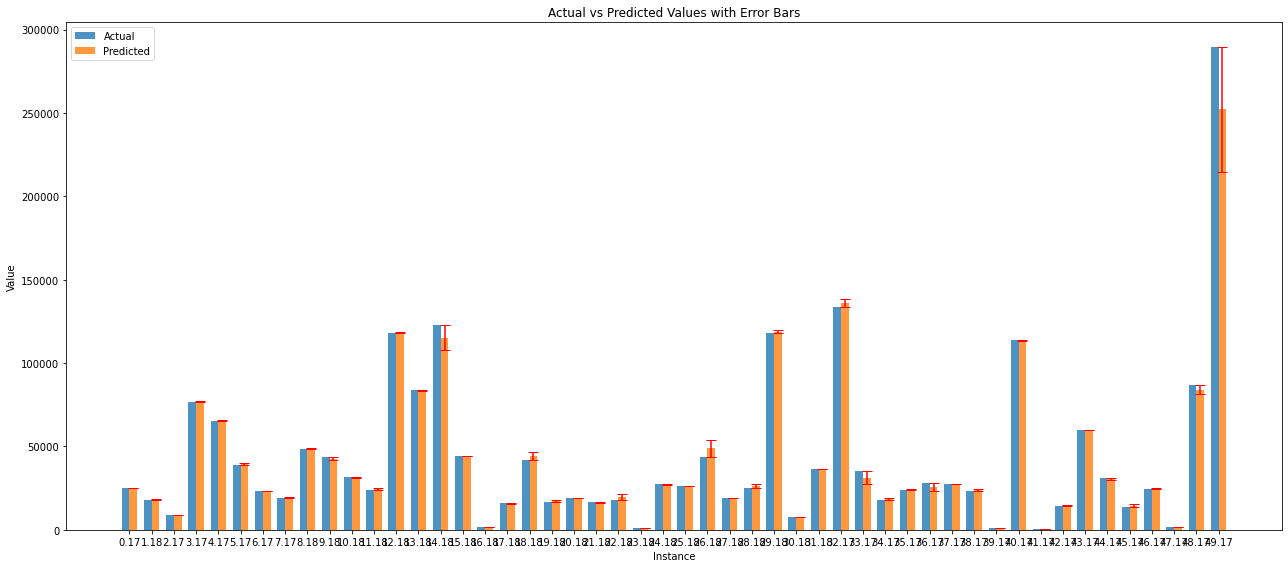

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the absolute errors
errors = np.abs(ytest - y_test_pred)

# Limiting the number of instances to display for clarity
num_instances = 50

# Indexes for our subset
indices = np.arange(num_instances)

# Create a bar width for better visualization
bar_width = 0.35

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create bars for actual and predicted values
bar1 = ax.bar(indices, ytest[:num_instances], bar_width, label='Actual', alpha=0.8)
bar2 = ax.bar(indices + bar_width, y_test_pred[:num_instances], bar_width, label='Predicted', alpha=0.8, yerr=errors[:num_instances], ecolor='red', capsize=5)

# Labeling the visualization
ax.set_xlabel('Instance')
ax.set_ylabel('Value')
ax.set_title('Actual vs Predicted Values with Error Bars')
ax.set_xticks(indices + bar_width / 2)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


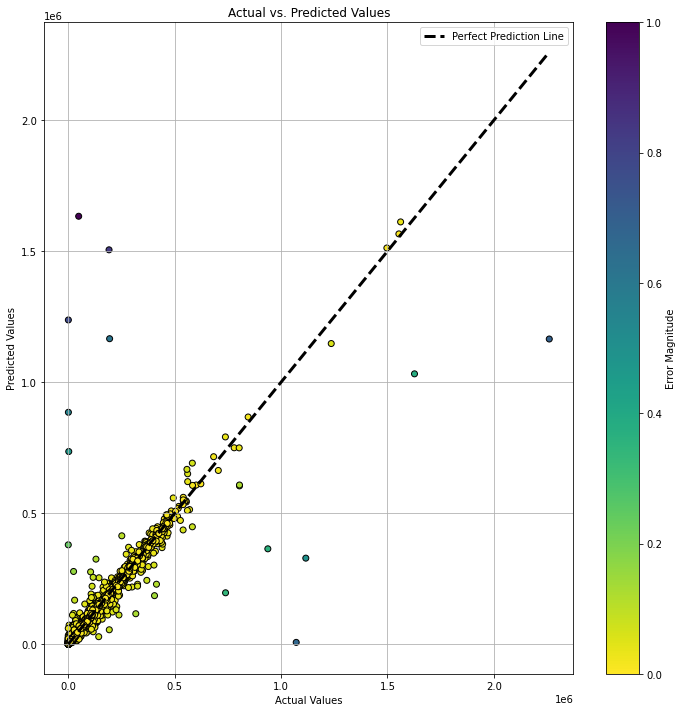

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Calculate the errors
errors = np.abs(ytest - y_test_pred)

# Normalize errors for color mapping
norm_errors = (errors - np.min(errors)) / (np.max(errors) - np.min(errors))

# Create scatter plot
plt.figure(figsize=(10, 10))
scatter = plt.scatter(ytest, y_test_pred, c=norm_errors, cmap='viridis_r', edgecolor='k')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], 'k--', lw=3, label='Perfect Prediction Line')
cbar = plt.colorbar(scatter)
cbar.set_label('Error Magnitude')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


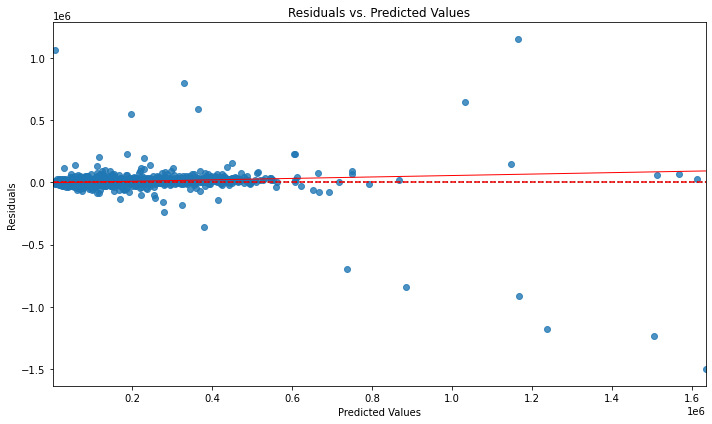

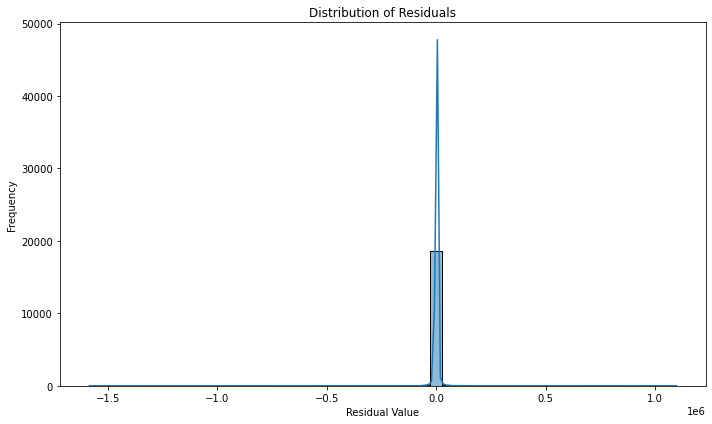

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the residuals
residuals = ytest - y_test_pred

# 1. Simple Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

# 2. Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [25]:
# Find the index of the best parameter combination based on a specific metric (e.g., RMSE)
best_rmse_index = np.argmin(rmse_scores)

# Access the best parameter combination
best_params_rmse = results['params'][best_rmse_index]
best_estimator_rmse = forest_reg.set_params(**best_params_rmse)  # Create a new estimator with the best parameters

# Fit the best estimator on the whole training data (if needed)
best_estimator_rmse.fit(Xtrain, ytrain)



RandomForestRegressor(n_estimators=30, random_state=7)

In [26]:
# Find the index of the best parameter combination based on a specific metric (e.g., RMSE)
best_rmse_index = np.argmin(rmse_scores)

# Access the best parameter combination
best_params_rmse = results['params'][best_rmse_index]
best_estimator_rmse = forest_reg.set_params(**best_params_rmse)  # Create a new estimator with the best parameters

# Fit the best estimator on the whole training data (if needed)
best_estimator_rmse.fit(Xtrain, ytrain)

# Use the best estimator for predictions or other tasks
y_pred_rmse = best_estimator_rmse.predict(Xtest)

# You can do the same for the MAE metric
best_mae_index = np.argmin(mae_scores)
best_params_mae = results['params'][best_mae_index]
best_estimator_mae = forest_reg.set_params(**best_params_mae)
best_estimator_mae.fit(Xtrain, ytrain)
y_pred_mae = best_estimator_mae.predict(Xtest)


In [27]:
# Calculate and print the RMSE score for the best RMSE estimator
rmse_score_rmse = np.sqrt(mean_squared_error(ytest, y_pred_rmse))
print(f"RMSE Score for Best RMSE Estimator: {rmse_score_rmse:.2f}")

# Calculate and print the MAE score for the best RMSE estimator
mae_score_rmse = mean_absolute_error(ytest, y_pred_rmse)
print(f"MAE Score for Best RMSE Estimator: {mae_score_rmse:.2f}")

# Calculate and print the RMSE score for the best MAE estimator
rmse_score_mae = np.sqrt(mean_squared_error(ytest, y_pred_mae))
print(f"RMSE Score for Best MAE Estimator: {rmse_score_mae:.2f}")

# Calculate and print the MAE score for the best MAE estimator
mae_score_mae = mean_absolute_error(ytest, y_pred_mae)
print(f"Best MAE Score: {mae_score_mae:.2f}")


RMSE Score for Best RMSE Estimator: 26899.15
MAE Score for Best RMSE Estimator: 2926.89
RMSE Score for Best MAE Estimator: 26899.15
Best MAE Score: 2926.89


In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Specify the hyperparameters and their values
param_dist = {
    'n_estimators': [3, 10, 30],
    'max_depth': [4, 6, 8, None]
}

forest_reg = RandomForestRegressor(random_state=7)

# Create a RandomizedSearchCV instance for RMSE
rand_search_rmse = RandomizedSearchCV(forest_reg, param_distributions=param_dist, n_iter=6, cv=10,
                                      scoring='neg_root_mean_squared_error', random_state=7,
                                      return_train_score=True, verbose=2)

rand_search_rmse.fit(Xtrain, ytrain)


Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END .......................max_depth=8, n_estimators=10; total time=   3.4s
[CV] END .......................max_depth=8, n_estimators=10; total time=   3.3s
[CV] END .......................max_depth=8, n_estimators=10; total time=   3.3s
[CV] END .......................max_depth=8, n_estimators=10; total time=   3.3s
[CV] END .......................max_depth=8, n_estimators=10; total time=   3.4s
[CV] END .......................max_depth=8, n_estimators=10; total time=   3.4s
[CV] END .......................max_depth=8, n_estimators=10; total time=   3.6s
[CV] END .......................max_depth=8, n_estimators=10; total time=   3.4s
[CV] END .......................max_depth=8, n_estimators=10; total time=   3.5s
[CV] END .......................max_depth=8, n_estimators=10; total time=   3.6s
[CV] END ....................max_depth=None, n_estimators=10; total time=   9.7s
[CV] END ....................max_depth=None, n_e

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=7),
                   n_iter=6,
                   param_distributions={'max_depth': [4, 6, 8, None],
                                        'n_estimators': [3, 10, 30]},
                   random_state=7, return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=2)

In [29]:
from sklearn.metrics import mean_absolute_error

# Access the RMSE score for the best parameter combination
best_rmse_score = -rand_search_rmse.best_score_

# Access the best parameters for RMSE
best_params_rmse = rand_search_rmse.best_params_

# Create a new RandomForestRegressor with the best parameters for RMSE
best_estimator_rmse = RandomForestRegressor(random_state=7, **best_params_rmse)

# Fit the best estimator for RMSE on the whole training data (if needed)
best_estimator_rmse.fit(Xtrain, ytrain)

# Use the best estimator for RMSE predictions
y_pred_rmse = best_estimator_rmse.predict(Xtest)

# Calculate and print the RMSE score
print(f"Best RMSE Score: {best_rmse_score:.2f}")

# Calculate and print the MAE score for the same best estimator
mae_score = mean_absolute_error(ytest, y_pred_rmse)
print(f"MAE Score for Best RMSE Estimator: {mae_score:.2f}")


Best RMSE Score: 18963.70
MAE Score for Best RMSE Estimator: 3143.01


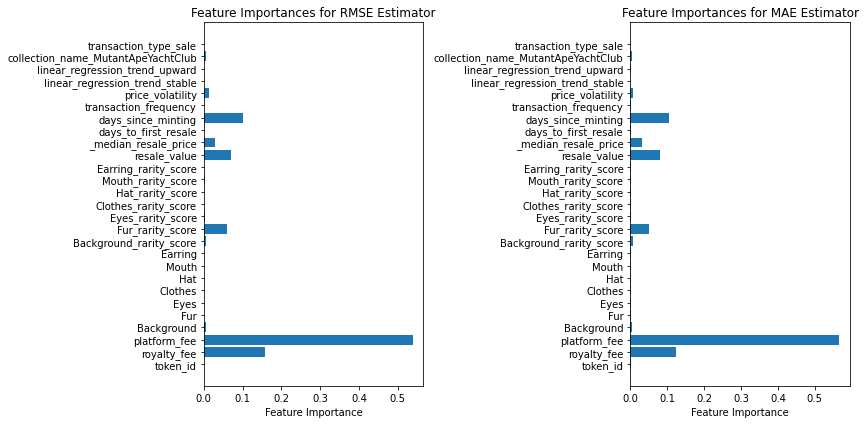

In [30]:
import matplotlib.pyplot as plt

# Put them into separate variables for convenience
feature_importances_rmse = best_estimator_rmse.feature_importances_
feature_importances_mae = best_estimator_mae.feature_importances_
feature_names = Xtrain.columns

# Create subplots for RMSE and MAE feature importances
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot RMSE feature importances
axes[0].barh(range(len(feature_importances_rmse)), feature_importances_rmse, align='center')
axes[0].set_yticks(range(len(feature_names)))
axes[0].set_yticklabels(feature_names)
axes[0].set_xlabel('Feature Importance')
axes[0].set_title('Feature Importances for RMSE Estimator')

# Plot MAE feature importances
axes[1].barh(range(len(feature_importances_mae)), feature_importances_mae, align='center')
axes[1].set_yticks(range(len(feature_names)))
axes[1].set_yticklabels(feature_names)
axes[1].set_xlabel('Feature Importance')
axes[1].set_title('Feature Importances for MAE Estimator')

plt.tight_layout()
plt.show()



# XGBoost Model 1 

In [27]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [0, 0.1, 0.2, 0.3]
}

# Create the XGBoostRegressor
xgb_model = XGBRegressor(random_state=42)

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_grid, n_iter=100, 
    cv=5, scoring='neg_mean_squared_error', random_state=42
)

# Fit the random search to your data
random_search.fit(Xtrain, ytrain)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_xgb_model = random_search.best_estimator_

# Make predictions with the best model
y_train_pred = best_xgb_model.predict(Xtrain)
y_test_pred = best_xgb_model.predict(Xtest)

# Calculate and print scores
train_rmse = mean_squared_error(ytrain, y_train_pred, squared=False)
test_rmse = mean_squared_error(ytest, y_test_pred, squared=False)

train_mae = mean_absolute_error(ytrain, y_train_pred)
test_mae = mean_absolute_error(ytest, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)


Best Hyperparameters: {'subsample': 1.0, 'reg_lambda': 0.2, 'reg_alpha': 0.3, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 0.9}
Training RMSE: 6536.243682198017
Testing RMSE: 22757.63907700629
Training MAE: 3157.7996396576964
Testing MAE: 4354.207578563613


In [29]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [0, 0.1, 0.2, 0.3]
}

# Create the XGBoostRegressor
xgb_model = XGBRegressor(random_state=42)

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_grid, n_iter=100, 
    cv=5, scoring='neg_mean_squared_error', random_state=42
)

# Fit the random search to your data
random_search.fit(Xtrain, ytrain)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_xgb_model = random_search.best_estimator_

# Make predictions with the best model
y_train_pred = best_xgb_model.predict(Xtrain)
y_test_pred = best_xgb_model.predict(Xtest)

# Calculate and print scores
train_rmse = mean_squared_error(ytrain, y_train_pred, squared=False)
test_rmse = mean_squared_error(ytest, y_test_pred, squared=False)

train_mae = mean_absolute_error(ytrain, y_train_pred)
test_mae = mean_absolute_error(ytest, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)

# 1. Use RFE with the XGBRegressor to rank and select the most important features
rfe_selector = RFE(estimator=xgb_model, n_features_to_select=5, step=1)
rfe_selector = rfe_selector.fit(Xtrain, ytrain)

# Select the important features based on RFE
Xtrain_selected = rfe_selector.transform(Xtrain)
Xtest_selected = rfe_selector.transform(Xtest)

# 2. Fit the RandomizedSearchCV only on the selected features from RFE
random_search.fit(Xtrain_selected, ytrain)

# 3. Evaluate the model's performance using the selected features
# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters with Feature Selection (RFE):", best_params)

# Get the best model
best_xgb_model = random_search.best_estimator_

# Make predictions with the best model
y_train_pred = best_xgb_model.predict(Xtrain_selected)
y_test_pred = best_xgb_model.predict(Xtest_selected)

# Calculate and print scores
train_rmse = mean_squared_error(ytrain, y_train_pred, squared=False)
test_rmse = mean_squared_error(ytest, y_test_pred, squared=False)

train_mae = mean_absolute_error(ytrain, y_train_pred)
test_mae = mean_absolute_error(ytest, y_test_pred)

print("Training RMSE (with Feature Selection):", train_rmse)
print("Testing RMSE (with Feature Selection):", test_rmse)
print("Training MAE (with Feature Selection):", train_mae)
print("Testing MAE (with Feature Selection):", test_mae)

# For information: Return the features selected by RFE
selected_features_rfe = np.where(rfe_selector.support_)[0]
selected_features_rfe


Best Hyperparameters: {'subsample': 1.0, 'reg_lambda': 0.2, 'reg_alpha': 0.3, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 0.9}
Training RMSE: 6536.243682198017
Testing RMSE: 22757.63907700629
Training MAE: 3157.7996396576964
Testing MAE: 4354.207578563613
Best Hyperparameters with Feature Selection (RFE): {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 1.0}
Training RMSE (with Feature Selection): 16447.86863096493
Testing RMSE (with Feature Selection): 27025.558742843394
Training MAE (with Feature Selection): 5636.639680008858
Testing MAE (with Feature Selection): 6326.3499877190725


array([ 1,  2, 11, 17, 20], dtype=int64)

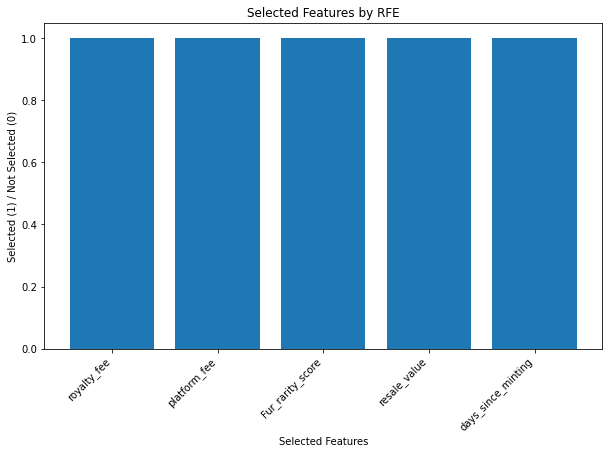

In [30]:
import matplotlib.pyplot as plt

# Get the feature names from Xtrain
feature_names = Xtrain.columns

# Get the indices of selected features
selected_indices = selected_features_rfe

# Get the names of selected features
selected_features = [feature_names[i] for i in selected_indices]

# Create a bar plot to visualize selected features
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), rfe_selector.support_[selected_indices])
plt.xlabel('Selected Features')
plt.ylabel('Selected (1) / Not Selected (0)')
plt.title('Selected Features by RFE')
plt.xticks(range(len(selected_features)), selected_features, rotation=45, ha='right')
plt.show()


In [31]:
import numpy as np

# Sort the selected features by their importance scores
# Assuming you have an importance score array named 'importance_scores'
# Replace it with your actual importance scores if available
selected_indices = np.array(selected_features_rfe)
sorted_indices = np.argsort(importance_scores[selected_indices])[::-1]

# Get the top 10 selected feature indices
top_10_indices = sorted_indices[:10]

# Get the names of the top 10 selected features
top_10_features = [feature_names[selected_indices[i]] for i in top_10_indices]

# Print or use the names of the top 10 selected features
print("Top 10 Selected Features:")
for feature in top_10_features:
    print(feature)


NameError: name 'importance_scores' is not defined

# XGboost Model 2

In [38]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.5, 1, 1.5, 2]
}

# Split data into training and validation sets for early stopping
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=42)

# Create the XGBoostRegressor
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)  # n_jobs=-1 to use all available cores

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_grid, n_iter=100, 
    cv=5, scoring='neg_mean_squared_error', random_state=42
)

# Fit the random search with early stopping
eval_set = [(X_val_sub, y_val_sub)]
random_search.fit(X_train_sub, y_train_sub, early_stopping_rounds=10, eval_metric="mae", eval_set=eval_set, verbose=False)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_xgb_model = random_search.best_estimator_

# Make predictions with the best model
y_train_pred = best_xgb_model.predict(Xtrain)
y_test_pred = best_xgb_model.predict(Xtest)

# Calculate and print scores
train_rmse = mean_squared_error(ytrain, y_train_pred, squared=False)
test_rmse = mean_squared_error(ytest, y_test_pred, squared=False)

train_mae = mean_absolute_error(ytrain, y_train_pred)
test_mae = mean_absolute_error(ytest, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)


C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

Best Hyperparameters: {'subsample': 0.9, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.7}
Training RMSE: 11606.940112416765
Testing RMSE: 20869.1744336467
Training MAE: 4101.410701121429
Testing MAE: 4955.651677252833


In [40]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor


# New hyperparameter grid
param_grid_refined = {
    'n_estimators': [150, 200, 250, 300],  # Around the previously found best value
    'max_depth': [2, 3, 4, 5],  # Slightly lower values to prevent potential overfitting
    'learning_rate': [0.005, 0.01, 0.05, 0.1],  # Introduced a smaller learning rate
    'subsample': [0.6, 0.7, 0.8, 0.9],  # Introduced a slightly lower subsample value
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],  # Similarly, a slightly lower value
    'gamma': [0, 0.05, 0.1, 0.15],  # Introduced a smaller gamma value
    'reg_alpha': [0, 0.05, 0.1, 0.5, 1, 1.5],  # Expanded range for L1 regularization
    'reg_lambda': [0.5, 1, 1.5, 2, 2.5, 3]  # Expanded range for L2 regularization
}


# Split data into training and validation sets for early stopping
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=42)

# Create the XGBoostRegressor
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)  # n_jobs=-1 to use all available cores

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_grid, n_iter=500, 
    cv=5, scoring='neg_mean_squared_error', random_state=42
)

# Fit the random search with early stopping
eval_set = [(X_val_sub, y_val_sub)]
random_search.fit(X_train_sub, y_train_sub, early_stopping_rounds=10, eval_metric="mae", eval_set=eval_set, verbose=False)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_xgb_model = random_search.best_estimator_

# Make predictions with the best model
y_train_pred = best_xgb_model.predict(Xtrain)
y_test_pred = best_xgb_model.predict(Xtest)

# Calculate and print scores
train_rmse = mean_squared_error(ytrain, y_train_pred, squared=False)
test_rmse = mean_squared_error(ytest, y_test_pred, squared=False)

train_mae = mean_absolute_error(ytrain, y_train_pred)
test_mae = mean_absolute_error(ytest, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3_2022_05\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

Best Hyperparameters: {'subsample': 0.9, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}
Training RMSE: 12352.977414501947
Testing RMSE: 20132.53223824473
Training MAE: 4309.772256051126
Testing MAE: 5029.67201790339


In [ ]:
# 1. Add the predicted values to the test set

# Create a copy of the test set
results = Xtest.copy()

# Add actual and predicted values
results['Actual_usd_price'] = ytest
results['Predicted_usd_price'] = y_pred

# 2. Visualize the results

import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(results['Actual_usd_price'], results['Predicted_usd_price'], alpha=0.5)
plt.title('Actual vs Predicted USD Price')
plt.xlabel('Actual USD Price')
plt.ylabel('Predicted USD Price')
plt.plot([min(results['Actual_usd_price']), max(results['Actual_usd_price'])], 
         [min(results['Actual_usd_price']), max(results['Actual_usd_price'])], color='red')  # Diagonal line
plt.show()
...

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [0, 0.1, 0.2, 0.3]
}

# Create the XGBoostRegressor
xgb_model = XGBRegressor(random_state=42)

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42
)

# Fit the randomized search to your data
random_search.fit(Xtrain, ytrain)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_xgb_model = random_search.best_estimator_

# Make predictions with the best model
y_pred = best_xgb_model.predict(Xtest)


In [ ]:
# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_xgb_model = random_search.best_estimator_

# Make predictions with the best model
y_pred = best_xgb_model.predict(Xtest)

# Calculate RMSE and MAE on the test set
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
mae = mean_absolute_error(ytest, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create a CatBoostRegressor model
catboost_model = CatBoostRegressor(
    verbose=0  # Set to 0 for no output during training, or adjust as needed
)

# Define the hyperparameter grid for tuning
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'l2_leaf_reg': [1, 3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bylevel': [0.8, 0.9, 1.0],
    'border_count': [32, 64, 128],  # Number of splits for numerical features
    'bagging_temperature': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0],  # Controls bagging intensity
    # Add other hyperparameters to tune here
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(Xtrain, ytrain)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Create a new CatBoost model with the best hyperparameters
best_catboost_model = CatBoostRegressor(**best_params, verbose=0)

# Fit the best model to the training data
best_catboost_model.fit(Xtrain, ytrain)

# Make predictions on the test data
y_pred = best_catboost_model.predict(Xtest)

# Calculate RMSE for evaluation
rmse = np.sqrt(mean_squared_error(ytest, y_pred))

# Calculate MAE for evaluation
mae = mean_absolute_error(ytest, y_pred)

print("Best Hyperparameters:", best_params)
print("CatBoost RMSE:", rmse)
print("CatBoost MAE:", mae)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Appending Predicted Values to Test Data
results = Xtest.copy()
results['Actual_usd_price'] = ytest
results['Predicted_usd_price'] = y_pred

# 2. Visualizations

# Scatter Plot
plt.figure(figsize=(12,6))
sns.scatterplot(x=results['Actual_usd_price'], y=results['Predicted_usd_price'], alpha=0.6)
plt.title('Actual vs Predicted USD Price')
plt.xlabel('Actual USD Price')
plt.ylabel('Predicted USD Price')
plt.plot([min(results['Actual_usd_price']), max(results['Actual_usd_price'])], 
         [min(results['Actual_usd_price']), max(results['Actual_usd_price'])], color='red')  # Diagonal line
plt.show()

# Residual Plot
plt.figure(figsize=(12,6))
sns.residplot(x=results['Actual_usd_price'], y=results['Predicted_usd_price'])
plt.title('Residual Plot')
plt.xlabel('Actual USD Price')
plt.ylabel('Residuals')
plt.show()

# Feature Importances
plt.figure(figsize=(12,10))
feature_importances = best_catboost_model.get_feature_importance()
sns.barplot(y=Xtrain.columns, x=feature_importances, orient='h')
plt.title('Feature Importances')
plt.show()


In [20]:
from catboost import CatBoostRegressor
from sklearn.feature_selection import RFE
import numpy as np

# Create the CatBoostRegressor
catboost_model = CatBoostRegressor(random_state=42, verbose=0)  # Added verbose=0 to suppress training output

# Use RFE with the CatBoostRegressor to rank and select the most important features
n_features_to_select = 10  # You can change this number based on your preference
rfe_selector = RFE(estimator=catboost_model, n_features_to_select=n_features_to_select, step=1)
rfe_selector = rfe_selector.fit(Xtrain, ytrain)

# Select the important features based on RFE
Xtrain_selected = rfe_selector.transform(Xtrain)
Xtest_selected = rfe_selector.transform(Xtest)

# Display the selected features
selected_features_rfe = np.where(rfe_selector.support_)[0]
print("Selected Features Indices:", selected_features_rfe)

# Fetch feature names directly from the Xtrain DataFrame
selected_feature_names = [Xtrain.columns[i] for i in selected_features_rfe]
print("Selected Feature Names:", selected_feature_names)

# Now, you can use Xtrain_selected and Xtest_selected for further modeling with any desired model


Selected Features Indices: [ 0  1  2 10 11 12 17 18 20 25]
Selected Feature Names: ['token_id', 'royalty_fee', 'platform_fee', 'Background_rarity_score', 'Fur_rarity_score', 'Eyes_rarity_score', 'resale_value', '_median_resale_price', 'days_since_minting', 'collection_name_MutantApeYachtClub']


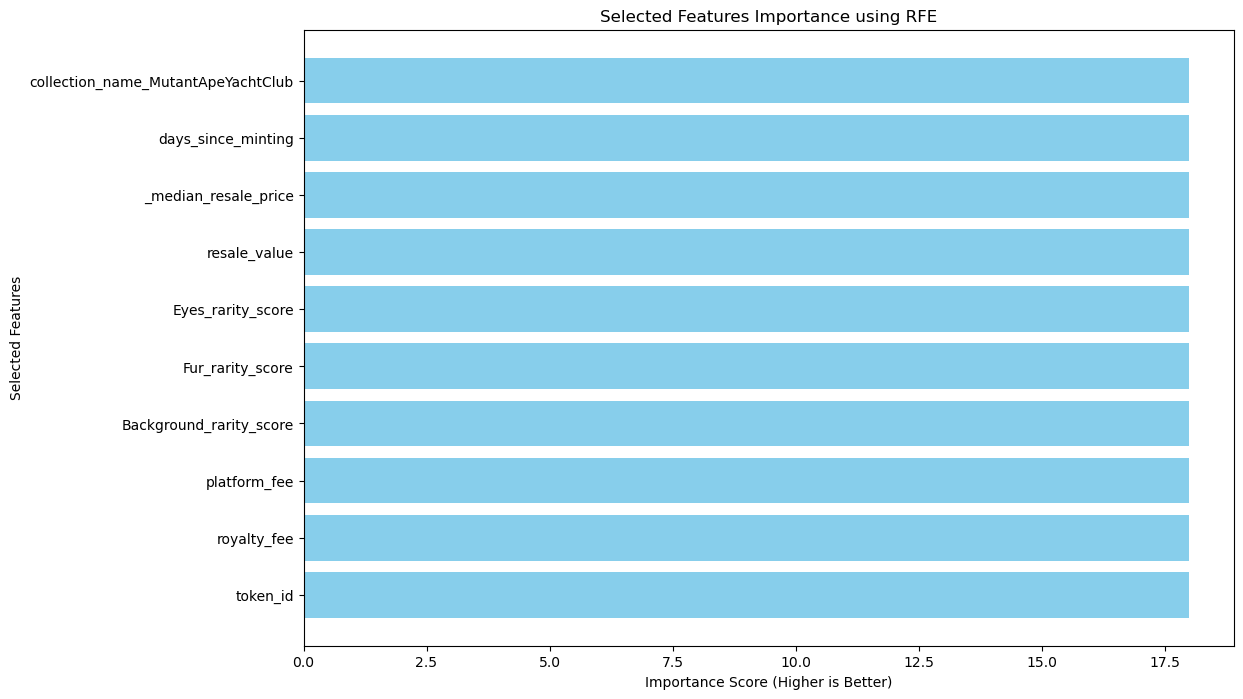

In [27]:
import matplotlib.pyplot as plt

# Extract feature rankings from the RFE selector
feature_ranking = rfe_selector.ranking_

# Invert the rankings so that higher values indicate more importance
inverse_ranking = max(feature_ranking) + 1 - feature_ranking

# Filter out the selected features
selected_columns = Xtrain.columns[rfe_selector.support_]
selected_inverse_rankings = inverse_ranking[rfe_selector.support_]

# Plot the inverted feature rankings for selected features
plt.figure(figsize=(12, 8))
plt.barh(selected_columns, selected_inverse_rankings, align='center', color='skyblue')
plt.xlabel('Importance Score (Higher is Better)')
plt.ylabel('Selected Features')
plt.title('Selected Features Importance using RFE')
plt.show()


royalty_fee                           2.110757
days_since_minting                    1.759979
platform_fee                          1.727632
_median_resale_price                  1.209615
resale_value                          0.821108
Mouth                                 0.449428
Fur                                   0.445506
Eyes                                  0.442469
Background                            0.433599
price_volatility                      0.432635
Background_rarity_score               0.427492
Fur_rarity_score                      0.426243
Mouth_rarity_score                    0.421018
Eyes_rarity_score                     0.418128
collection_name_MutantApeYachtClub    0.402134
Clothes                               0.370553
Hat                                   0.344212
days_to_first_resale                  0.326077
token_id                              0.257680
Hat_rarity_score                      0.192632
transaction_frequency                 0.161227
Clothes_rarit

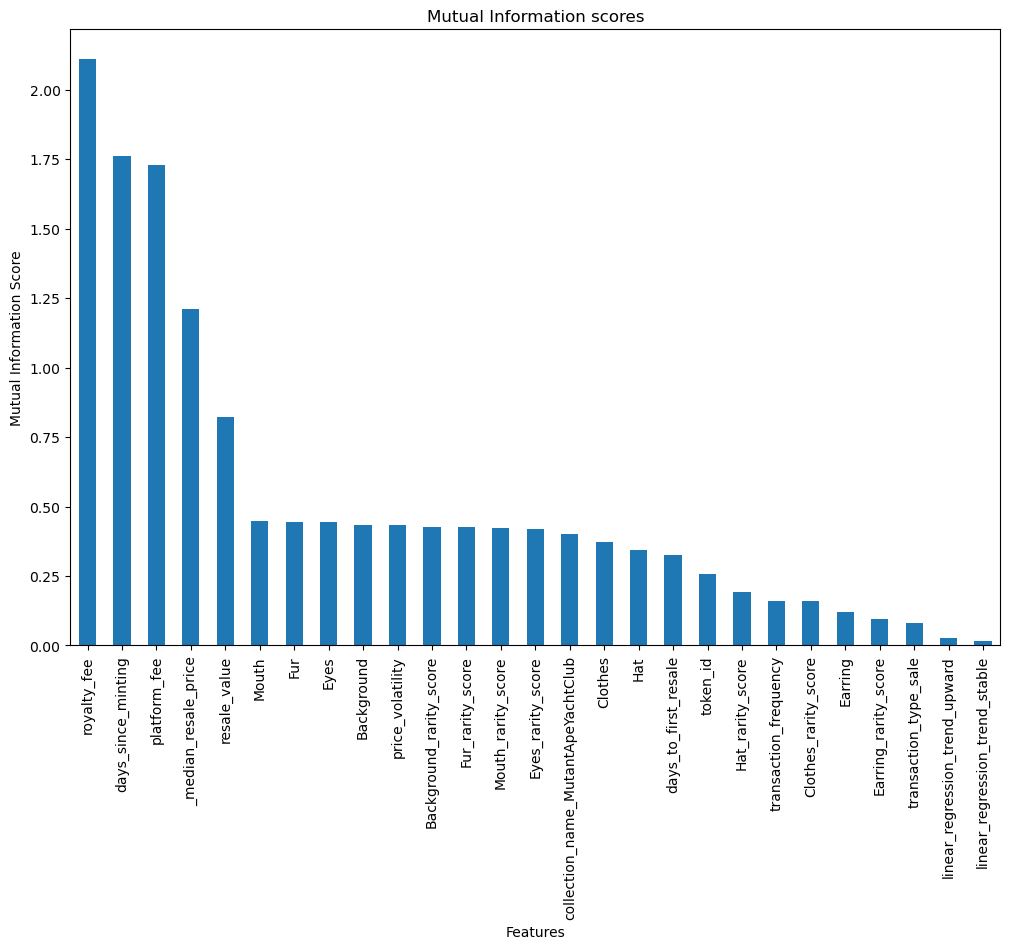

Selected top 10 features based on Mutual Information: ['royalty_fee', 'days_since_minting', 'platform_fee', '_median_resale_price', 'resale_value', 'Mouth', 'Fur', 'Eyes', 'Background', 'price_volatility']


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Calculate Mutual Information between each feature and the target
mi_scores = mutual_info_regression(Xtrain, ytrain)

# Convert MI scores to a DataFrame for better visualization
mi_scores = pd.Series(mi_scores, name="MI_Scores", index=Xtrain.columns)

# Sort scores in descending order
mi_scores = mi_scores.sort_values(ascending=False)

# Display the MI scores
print(mi_scores)

# Plotting the MI scores
plt.figure(figsize=(12, 8))
mi_scores.plot(kind='bar')
plt.title('Mutual Information scores')
plt.ylabel('Mutual Information Score')
plt.xlabel('Features')
plt.show()

# Selecting the top N features with the highest MI scores
N = 10  # You can change this value based on your preference
top_features = mi_scores.index[:N]

# Filtering the data to include only the top features
Xtrain_selected = Xtrain[top_features]
Xtest_selected = Xtest[top_features]

print(f"Selected top {N} features based on Mutual Information: {top_features.tolist()}")


[16:00:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[16:00:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


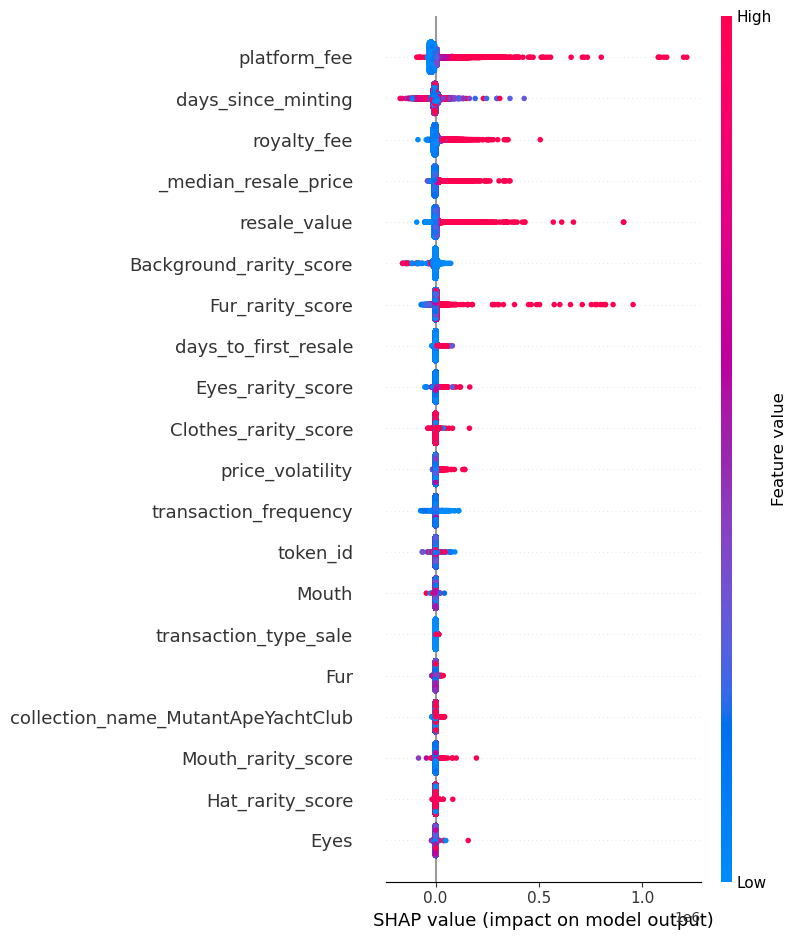

Top 10 features ranked by importance:
platform_fee: 23173.77734375
days_since_minting: 9946.740234375
royalty_fee: 9293.8994140625
_median_resale_price: 5064.6298828125
resale_value: 4761.6142578125
Background_rarity_score: 3871.91650390625
Fur_rarity_score: 1586.0706787109375
days_to_first_resale: 1441.0362548828125
Eyes_rarity_score: 778.6053466796875
Clothes_rarity_score: 652.14501953125


In [28]:
import xgboost as xgb
import shap
import numpy as np

# Train an XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')  # 'reg:squarederror' is used to silence a warning in newer versions of XGBoost
model.fit(Xtrain, ytrain)

# Compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(Xtrain)

# Plot SHAP values to understand feature importance
shap.summary_plot(shap_values, Xtrain)

# Get mean absolute SHAP value for each feature to rank them
mean_shap_values = np.abs(shap_values.values).mean(axis=0)
sorted_indices = np.argsort(mean_shap_values)[::-1]

# Display top 10 features ranked by importance based on mean absolute SHAP values
print("Top 10 features ranked by importance:")
top_features = [Xtrain.columns[idx] for idx in sorted_indices[:10]]
for idx in sorted_indices[:10]:
    print(f"{Xtrain.columns[idx]}: {mean_shap_values[idx]}")

# If you want to filter your dataset to include only these top 10 features:
Xtrain_selected = Xtrain[top_features]
Xtest_selected = Xtest[top_features]
